### Компьютерное зрение
# Лабораторная работа 3. Матчинг изображений по характерным точкам

### На основе материалов курса "Когнитивные технологии", ВШЭ

### Работу выполнил: <span style="color:blue">Михаил Батухтин</span>

### Сделанную вторую лабораторную работу отправляйте через [ФОРМУ](https://vyatsu-my.sharepoint.com/:f:/g/personal/usr09019_vyatsu_ru/EgN4Dg_-QoNAsKVMCsYXf70BFch2-cFrfghWddZLVCiXtg)

In [39]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

## 1. Выполним сравнение двух изображений при наличии поворота

**Загружаем изображения для матчинга**

In [40]:
img1 = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE) # шаблон
img2 = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE) # сцена

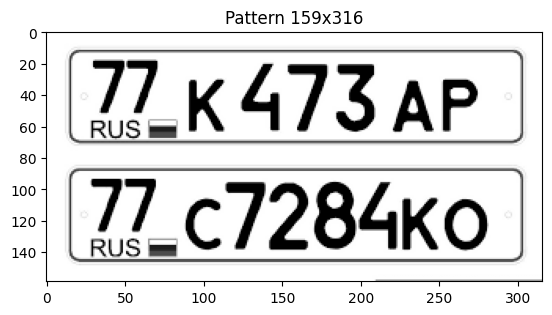

In [41]:
plt.imshow(img1, cmap='gray')
plt.title('Pattern %dx%d' % img1.shape);

**Выполним поворот второго изображения**

In [42]:
(h, w) = img2.shape[:2]
center = (w / 2, h / 2)

M = cv2.getRotationMatrix2D(center, 5, 1.0)
img2 = cv2.warpAffine(img2, M, (w, h))

Text(0.5, 1.0, 'Scene 159x316')

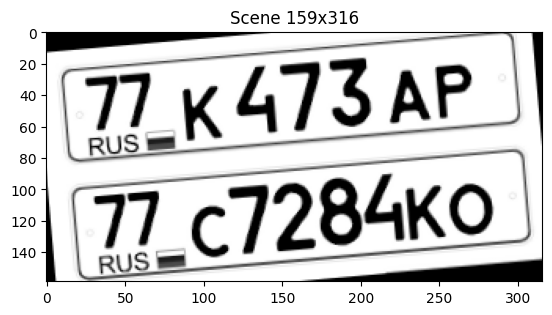

In [43]:
plt.imshow(img2, cmap='gray')
plt.title('Scene %dx%d' % img2.shape)

**Создадим функцию вычисляющую дескрипторы характерных точек ORB**
**Ищем характерные точки и вычисляем для них дескрипторы**

In [44]:
def get_ORB(img):
    # https://en.wikipedia.org/wiki/Oriented_FAST_and_rotated_BRIEF
    
    # инициализируем детектор точек
    orb = cv2.ORB_create()
    
    # запускаем поиск точек и вычисление дескрипторов
    kp1, des1 = orb.detectAndCompute(img, None)
    
    return kp1, des1

In [45]:
kp1, des1 = get_ORB(img1)
kp2, des2 = get_ORB(img2)

**Отобразим найденные характерные точки**

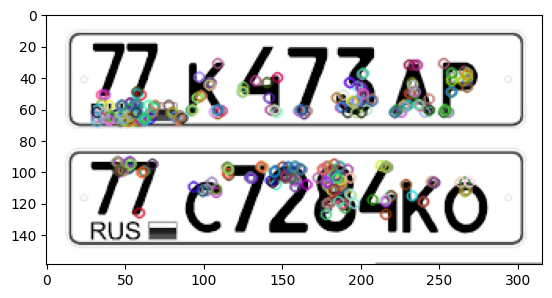

In [46]:
img1_kp = cv2.drawKeypoints(img1, kp1, np.zeros_like(img1))
plt.imshow(img1_kp)

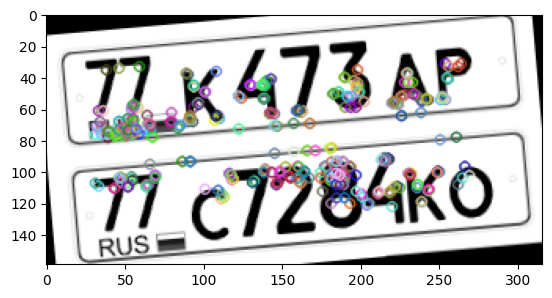

In [47]:
img2_kp = cv2.drawKeypoints(img2, kp2, np.zeros_like(img1))
plt.imshow(img2_kp)

**Создадим функцию выполняющей поиск соответствия между двумя изображениями на основе полного перебора**

In [48]:
def bf_matching(img1, kp1, img2, kp2):
    # матчинг полным перебором - brute force matching
    
    # мера расстояния - расстояние Хэмминга (количество несовпадающих компонент)    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    
    # матчинг
    matches = bf.match(des1, des2)
    
    # сортируем результат по убыванию расстояния
    matches = sorted(matches, key = lambda x: x.distance)
    
    # выводим 10 лучших совпадений
    img3 = np.zeros_like(img2)
    img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:7], img3, flags=2)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img3),plt.show()

In [49]:
kp1, des1 = get_ORB(img1)
kp2, des2 = get_ORB(img2)

**Создадим функцию выполняющей поиск соответствия между двумя изображениями на основе k-ближайших соседей**

In [50]:
def knn_matching(img1, kp1, img2, kp2):
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = np.zeros_like(img2)
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img3),plt.show()

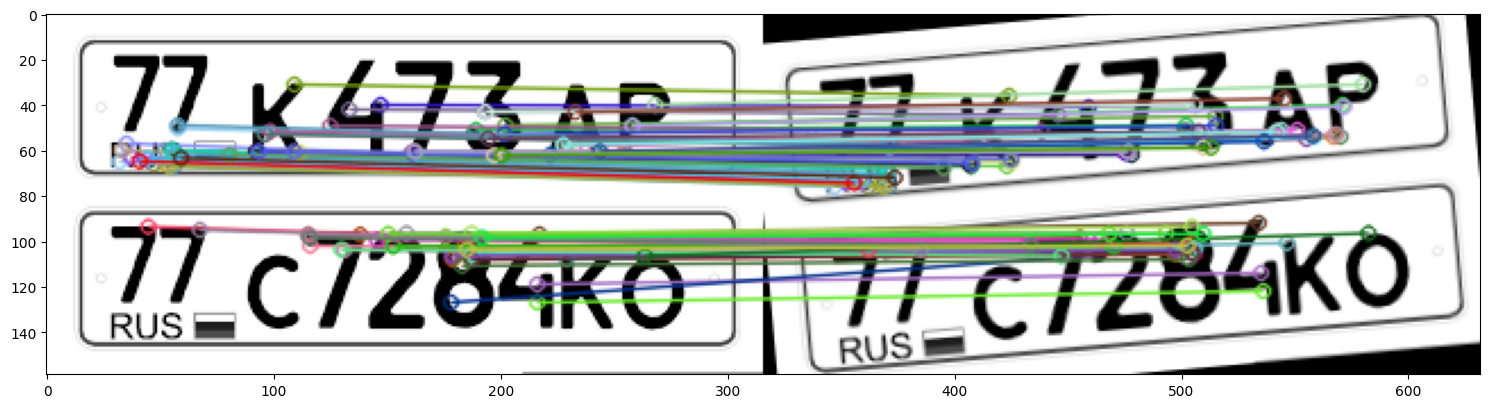

In [51]:
knn_matching(img1, kp1, img2, kp2)

## 2. Выполним сравнение двух изображений при наличии различий в масштабе

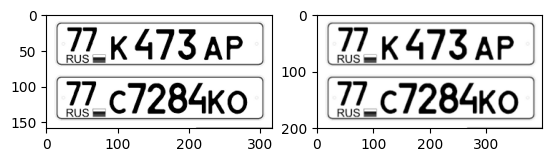

In [52]:
final_wide = 400
r = float(final_wide) / img1.shape[1]
dim = (final_wide, int(img1.shape[0] * r))
 
# уменьшаем изображение до подготовленных размеров
img4 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.subplot(122)
plt.imshow(img4, cmap='gray')

In [53]:
# запускаем поиск точек и вычисление дескрипторов
kp1, des1 = get_ORB(img1)
kp2, des2 = get_ORB(img4)

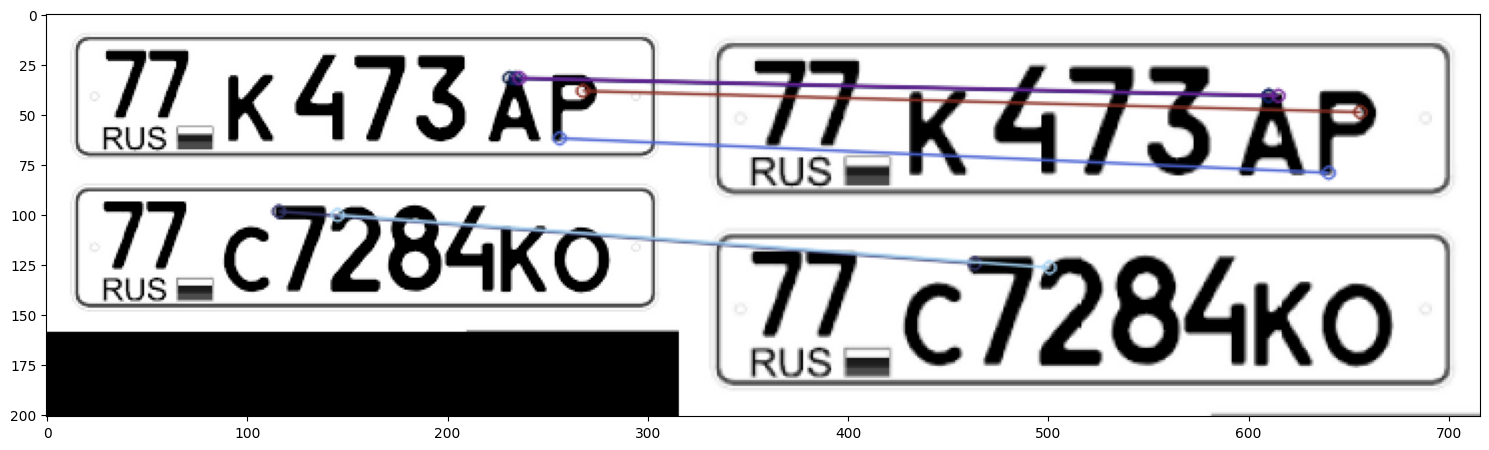

In [54]:
bf_matching(img1, kp1, img4, kp2)

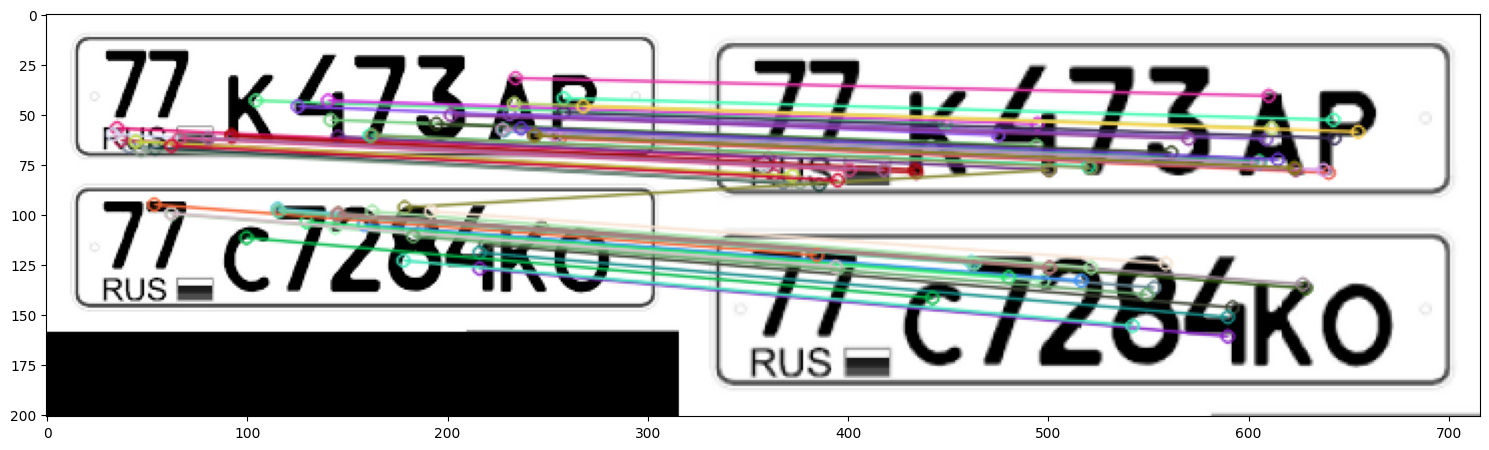

In [55]:
knn_matching(img1, kp1, img4, kp2)

## 3a. Выполним сравнение двух изображений, одно из которых является частью другого (обрезанное изображение)

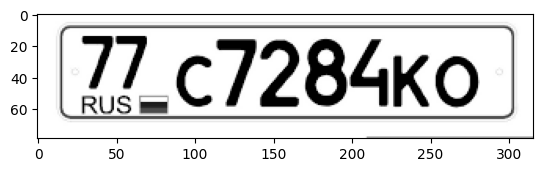

In [56]:
img5 = img1[80:, :]
plt.imshow(img5, cmap='gray')

In [57]:
# запускаем поиск точек и вычисление дескрипторов
kp1, des1 = get_ORB(img1)
kp2, des2 = get_ORB(img5)

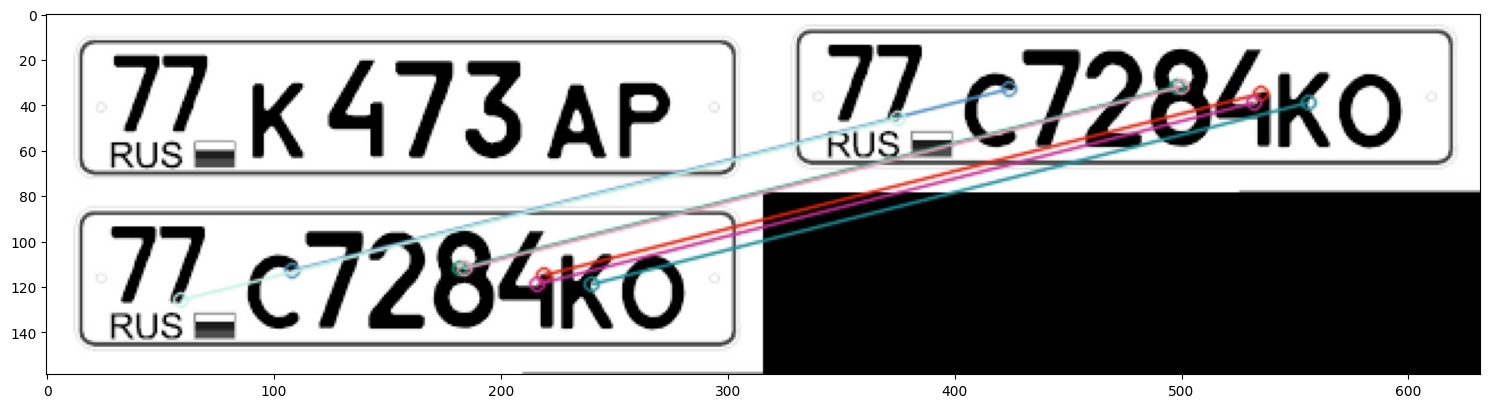

In [58]:
bf_matching(img1, kp1, img5, kp2)

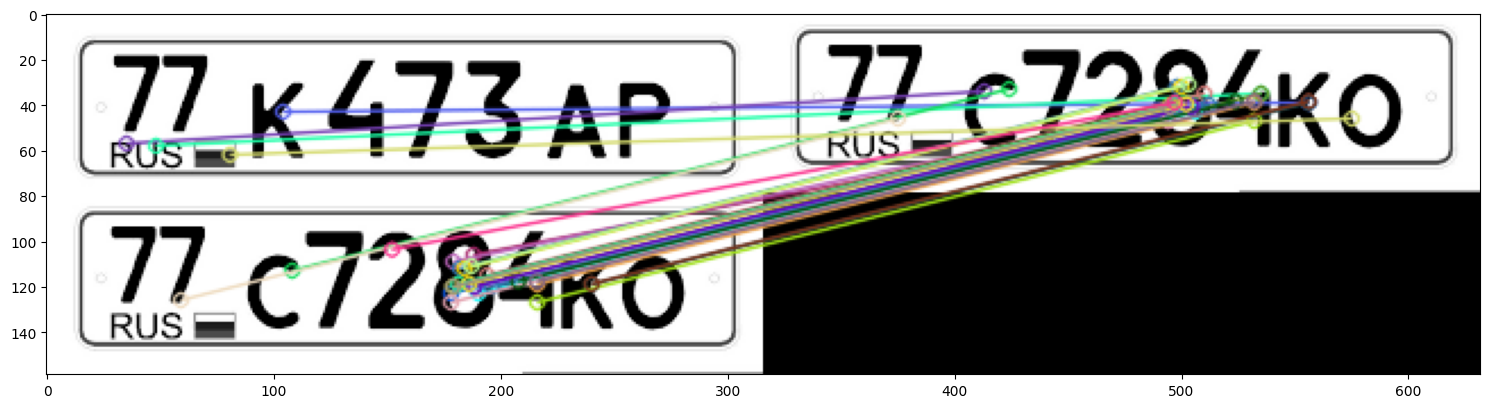

In [59]:
knn_matching(img1, kp1, img5, kp2)

## 3b. И для более сложных изображений

In [60]:
img1 = cv2.imread('vangog0.jpg', cv2.IMREAD_GRAYSCALE)          # шаблон
img2 = cv2.imread('vangog1.jpg', cv2.IMREAD_GRAYSCALE) # сцена

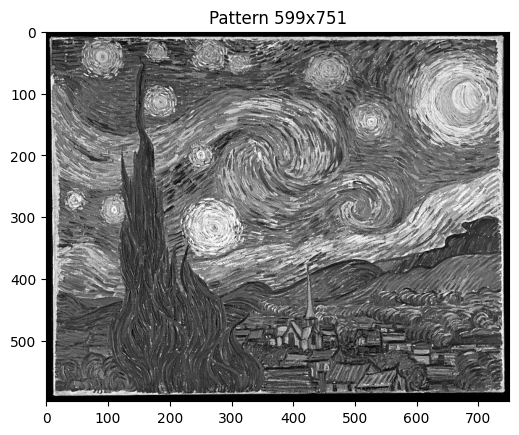

In [61]:
plt.imshow(img1, cmap='gray')
plt.title('Pattern %dx%d' % img1.shape);

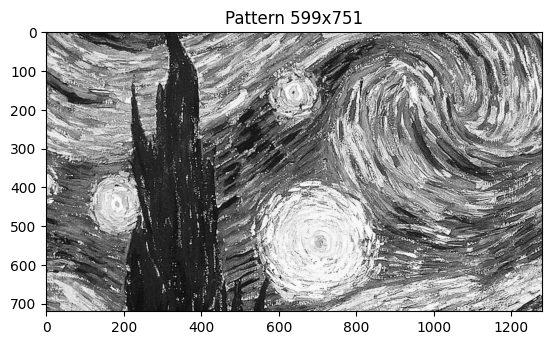

In [62]:
plt.imshow(img2, cmap='gray')
plt.title('Pattern %dx%d' % img1.shape);

In [63]:
# запускаем поиск точек и вычисление дескрипторов
kp1, des1 = get_ORB(img1)
kp2, des2 = get_ORB(img2)

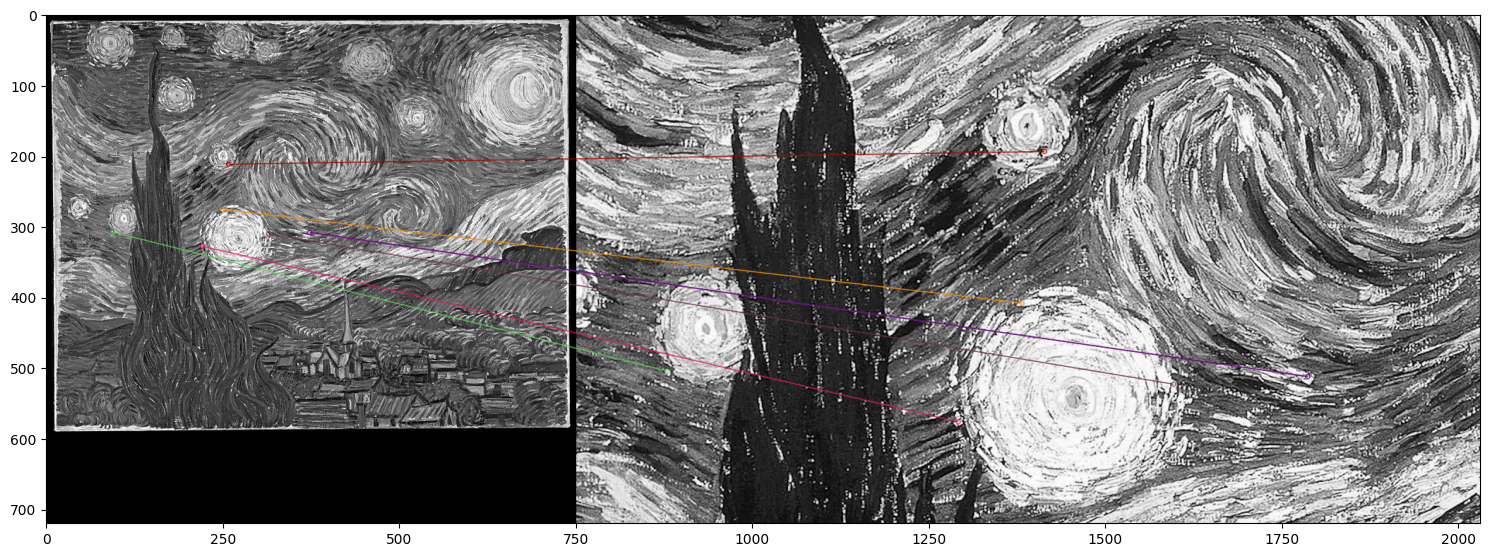

In [64]:
bf_matching(img1, kp1, img2, kp2)

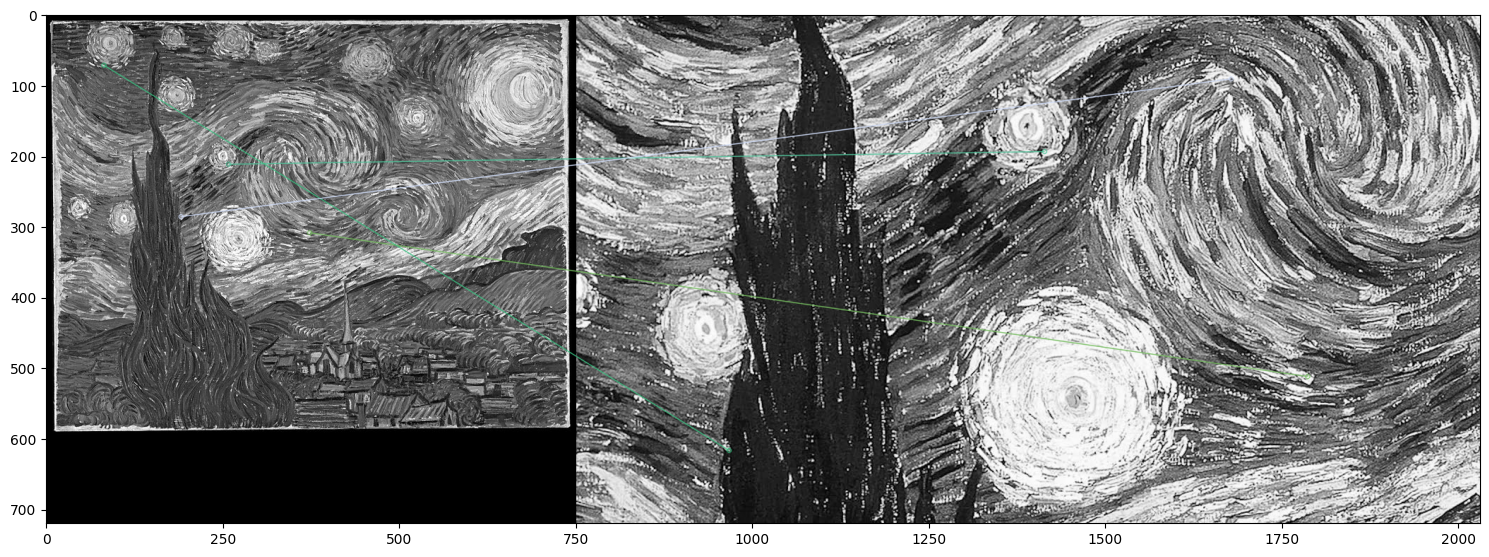

In [65]:
knn_matching(img1, kp1, img2, kp2)

# Задание.
Опираясь на справку ответьте на следующие вопросы:
- Что возвращает метод detectAndCompute()?
- Что возвращает метод drawKeypoints()?
- Что такое расстояние Хэмминга?
- Что такое дескриптор особых точек? Приведите примеры различных дескрипторов

1. Что возвращает метод detectAndCompute()?
detectAndCompute() возвращает два значения:
- keypoints: список объектов KeyPoint, содержащих координаты и характеристики особых точек
- descriptors: массив дескрипторов для каждой особой точки

2. Что возвращает метод drawKeypoints()?
    drawKeypoints() возвращает изображение с отрисованными на нем особыми точками

3. Что такое расстояние Хэмминга?
    количество различающихся битов в двух бинарных векторах.

4. Что такое дескриптор особых точек? Приведите примеры различных дескрипторов
    вектор, описывающий область вокруг особой точки.
"""

# Задание.
- Соберите коллекцию из 12 изображений различных картин художников (с повторением произведений, но все изображения должны быть разными)
- Создайте массив (список) из собранных изоборажений (по имени файла)
- Создайте несколько функций, позволяющих выполнять поиск для заданного изображения наиболее похожего изображения из коллекции, используя количество совпавших дескрипторов особых точек
- Протестируйте работу функций

Выбранные изображения:
1. photo_2025-10-15_17-25-04.jpg
2. photo_2025-10-15_17-25-12.jpg
3. photo_2025-10-15_17-25-45.jpg
4. img.png
5. photo_2025-10-15_17-25-38.jpg
6. photo_2025-10-15_17-25-15.jpg
7. photo_2025-10-15_17-25-09.jpg
8. pict.jpg
9. photo_2025-10-15_17-25-35.jpg
10. photo_2025-10-15_17-25-31.jpg
11. img_1.png
12. photo_2025-10-15_17-25-42.jpg

Ищем похожие для: photo_2025-10-15_17-25-38.jpg


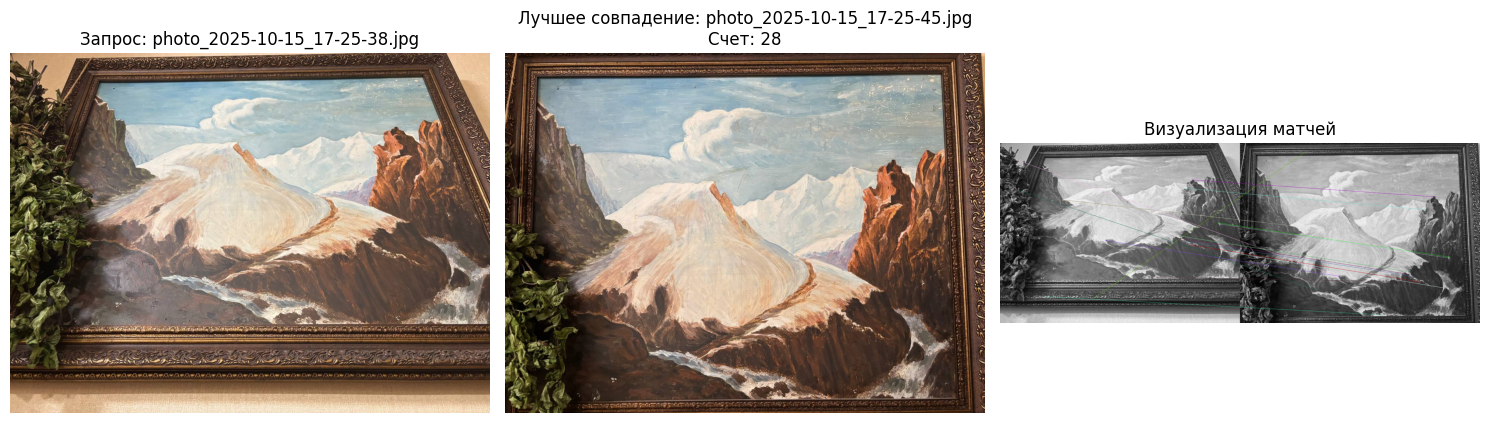


Топ-3 похожих изображения для photo_2025-10-15_17-25-38.jpg:
1. photo_2025-10-15_17-25-45.jpg - 28 совпадений
2. photo_2025-10-15_17-25-42.jpg - 21 совпадений
3. photo_2025-10-15_17-25-12.jpg - 4 совпадений


In [79]:
# Импорт библиотек
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import random
from pathlib import Path

# Функция для получения дескрипторов ORB
def get_ORB(img):
    orb = cv2.ORB_create()
    kp, des = orb.detectAndCompute(img, None)
    return kp, des

def compare_descriptors(des1, des2):
    if des1 is None or des2 is None:
        return 0

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    return len(good)

def find_best_match(query_img_path, image_descriptors):
    query_img = cv2.imread(query_img_path, cv2.IMREAD_GRAYSCALE)
    if query_img is None:
        print(f"Не удалось загрузить изображение: {query_img_path}")
        return None, 0

    kp_query, des_query = get_ORB(query_img)

    best_match = None
    best_score = 0

    for img_path, (kp, des) in image_descriptors.items():
        if img_path == query_img_path:
            continue

        score = compare_descriptors(des_query, des)

        if score > best_score:
            best_score = score
            best_match = img_path

    return best_match, best_score

data_path = "../data/pictures"
image_files = [f for f in os.listdir(data_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

if len(image_files) < 12:
    pass
else:
    selected_images = random.sample(image_files, 12)
    image_paths = [os.path.join(data_path, img) for img in selected_images]
    print("Выбранные изображения:")
    for i, path in enumerate(image_paths):
        print(f"{i+1}. {os.path.basename(path)}")


image_descriptors = {}
for img_path in image_paths:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        kp, des = get_ORB(img)
        image_descriptors[img_path] = (kp, des)
    else:
        print(f"Не удалось загрузить: {img_path}")

query_image = random.choice(image_paths)
print(f"\nИщем похожие для: {os.path.basename(query_image)}")

best_match, score = find_best_match(query_image, image_descriptors)

if best_match:
    query_img = cv2.imread(query_image)
    match_img = cv2.imread(best_match)
    query_img_rgb = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    match_img_rgb = cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(query_img_rgb)
    plt.title(f'Запрос: {os.path.basename(query_image)}')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(match_img_rgb)
    plt.title(f'Лучшее совпадение: {os.path.basename(best_match)}\nСчет: {score}')
    plt.axis('off')
    kp1, des1 = image_descriptors[query_image]
    kp2, des2 = image_descriptors[best_match]

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append([m])

    match_img_vis = cv2.drawMatchesKnn(
        cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY), kp1,
        cv2.cvtColor(match_img, cv2.COLOR_BGR2GRAY), kp2,
        good, None, flags=2
    )

    plt.subplot(1, 3, 3)
    plt.imshow(match_img_vis)
    plt.title('Визуализация матчей')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Не удалось найти похожие изображения")

def find_top_matches(query_img_path, image_descriptors, top_n=3):
    query_img = cv2.imread(query_img_path, cv2.IMREAD_GRAYSCALE)
    if query_img is None:
        return []
    kp_query, des_query = get_ORB(query_img)
    scores = []
    for img_path, (kp, des) in image_descriptors.items():
        if img_path == query_img_path:
            continue
        score = compare_descriptors(des_query, des)
        scores.append((img_path, score))
    scores.sort(key=lambda x: x[1], reverse=True)

    return scores[:top_n]

print(f"\nТоп-3 похожих изображения для {os.path.basename(query_image)}:")
top_matches = find_top_matches(query_image, image_descriptors, 3)

for i, (img_path, score) in enumerate(top_matches):
    print(f"{i+1}. {os.path.basename(img_path)} - {score} совпадений")